# Optuna with SKLearn

- Note that test data is used.  This is not a good practice.  See next notebook for correct usage.

In [ ]:
import pandas as pd
import optuna

In [21]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
_X = dataset.data
_y = dataset.target
print(_X.shape, _y.shape)

(442, 10) (442,)


In [22]:
from sklearn.model_selection import train_test_split

_X_train, _X_test, _y_train, _y_test = train_test_split(
    _X, _y, test_size=0.3, random_state=42
)

In [23]:
from sklearn.preprocessing import StandardScaler

scX = StandardScaler()
_X_train = scX.fit_transform(_X_train)
_X_test = scX.transform(_X_test)

scY = StandardScaler()
_y_train = scY.fit_transform(_y_train.reshape(-1, 1)).flatten()
_y_test = scY.transform(_y_test.reshape(-1, 1)).flatten()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

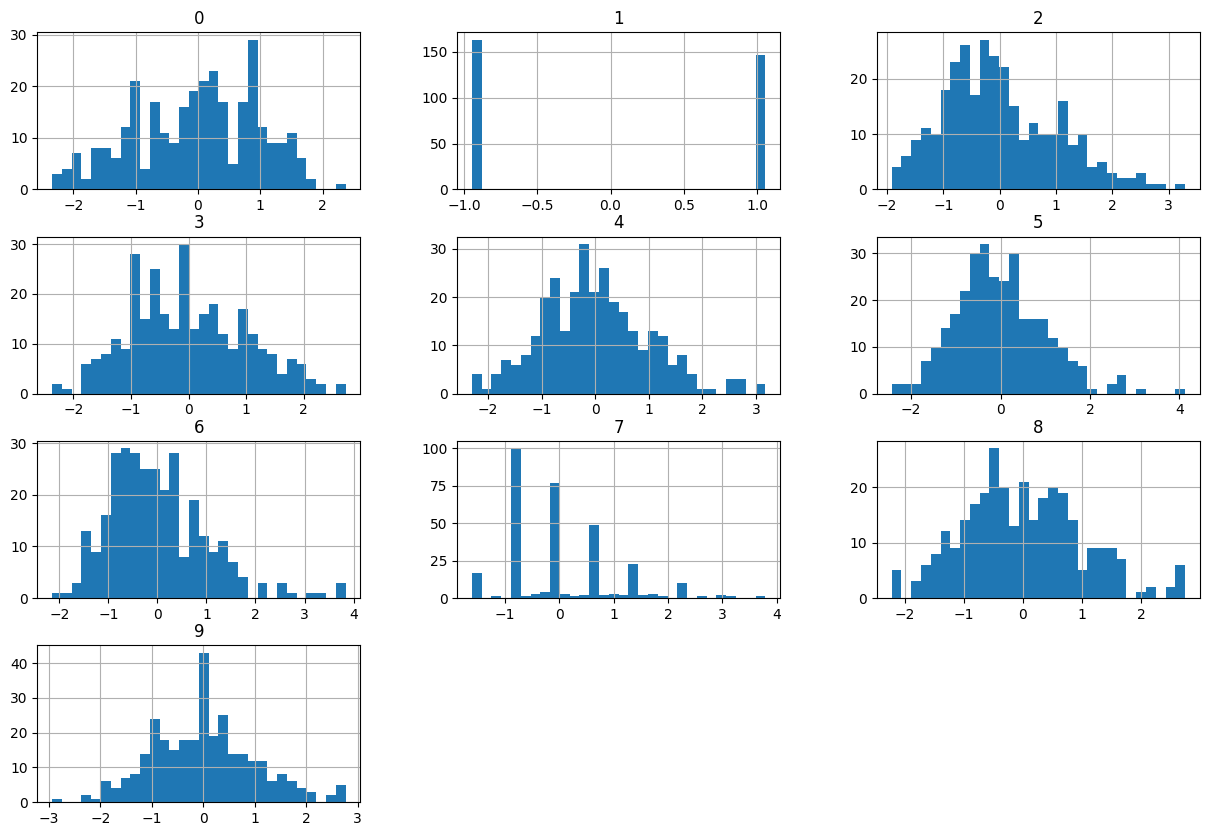

In [24]:
pd.DataFrame(_X_train).hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': '0'}>]], dtype=object)

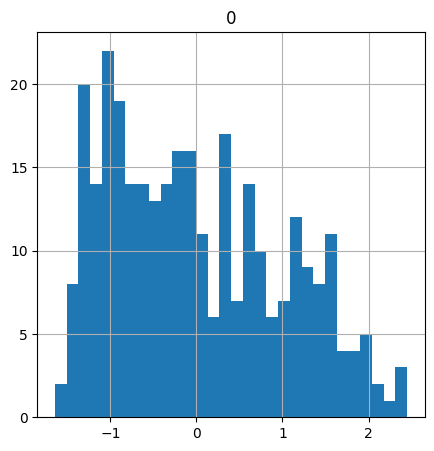

In [25]:
pd.DataFrame(_y_train).hist(bins=30, figsize=(5, 5))

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    forrest = RandomForestRegressor(
        n_estimators=n_estimators, max_depth=max_depth, random_state=42
    )
    forrest.fit(_X_train, _y_train)
    y_pred = forrest.predict(_X_test)
    mse = mean_squared_error(_y_test, y_pred)
    return mse

In [27]:
study = optuna.create_study()
study.optimize(objective, n_trials=50)

[I 2025-12-24 11:39:23,236] A new study created in memory with name: no-name-3c7ebfcb-34ab-47b6-bfde-4185f8cacca7
[I 2025-12-24 11:39:23,271] Trial 0 finished with value: 0.47637371394708455 and parameters: {'n_estimators': 21, 'max_depth': 31}. Best is trial 0 with value: 0.47637371394708455.
[I 2025-12-24 11:39:23,327] Trial 1 finished with value: 0.4812427486209824 and parameters: {'n_estimators': 79, 'max_depth': 2}. Best is trial 0 with value: 0.47637371394708455.
[I 2025-12-24 11:39:23,414] Trial 2 finished with value: 0.47907945787427975 and parameters: {'n_estimators': 124, 'max_depth': 2}. Best is trial 0 with value: 0.47637371394708455.
[I 2025-12-24 11:39:23,479] Trial 3 finished with value: 0.4896603395856125 and parameters: {'n_estimators': 42, 'max_depth': 15}. Best is trial 0 with value: 0.47637371394708455.
[I 2025-12-24 11:39:23,648] Trial 4 finished with value: 0.4616203004169104 and parameters: {'n_estimators': 106, 'max_depth': 18}. Best is trial 4 with value: 0.461

In [28]:
best_params = study.best_params
print("Best parameters:", best_params)
print("Best MSE:", study.best_value)


Best parameters: {'n_estimators': 40, 'max_depth': 3}
Best MSE: 0.43996436216260637
